Classification using Feed Forwrd Neural Network

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [ ]:
from keras.datasets import mnist

In [ ]:
import cv2

frames = []
# Open the video file
cap = cv2.VideoCapture(r'/content/mnist_dream.mp4')

# Check if the video file opened successfully
if not cap.isOpened():
    print("Error: Couldn't open video file.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    frames.append(frame)

    # Check if the frame was captured successfully
    if not ret:
        print("End of video.")
        break

print(frames)

End of video.
[array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [

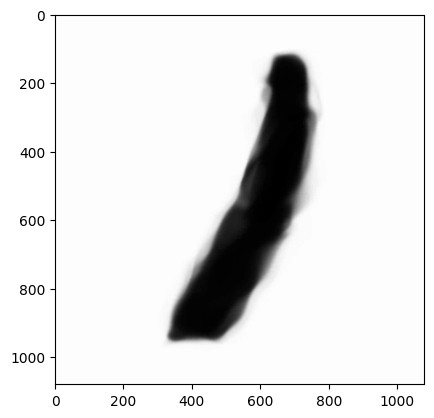

In [ ]:
plt.imshow(frames[30], cmap='gray')

In [ ]:
keras_dataset= tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = keras_dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_flattened = x_train.reshape(60000, 28*28)
x_test_flattened  = x_test.reshape(len(x_test), 28*28)
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, input_shape=(784, ), activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model1.compile(
    optimizer = 'Adamax',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model1.fit(x_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 0.3155 - accuracy: 0.9101
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1488 - accuracy: 0.9562
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1077 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0842 - accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0677 - accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0566 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0476 - accuracy: 0.9859
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0399 - accuracy: 0.9882
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0335 - accuracy: 0.9902
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.02

In [ ]:
img = cv2.resize(frames[30],(28, 28))

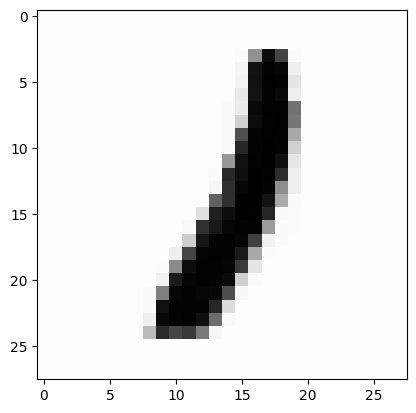

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
pred = model1.predict(img.reshape(1,784))

1/1 [==============================] - 0s 94ms/step


In [ ]:
print(pred)
for i in pred[0]:
    print(i)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
pred = np.argmax(pred)

In [ ]:
print(pred)

0


In [ ]:
def preprocess_image():
    img = cv2.resize(frames[30],(28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape(1,784)

    return img

In [ ]:
import IPython
import cv2
import numpy as np

mnist_dream_path = r'C:\Users\hp\Downloads\mnist_dream.mp4'
mnist_prediction_path = r'C:\Users\hp\Desktop\mnist_prediction'
def cv2_imshow(img):
    ret = cv2.imencode('.png', img)[1].tobytes()
    img_ip = IPython.display.Image(data=ret)
    IPython.display.display(img_ip)
cap = cv2.VideoCapture(mnist_dream_path)
vw = None
frame = -1 # counter for debugging (mostly), 0-indexed
# go through all the frames and run our classifier on the high res MNIST images as they morph from number to number
while True: # should 481 frames
    frame += 1
    ret, img = cap.read()
    if not ret: break
    assert img.shape[0] == img.shape[1] # should be a square
    if img.shape[0] != 720:
        img = cv2.resize(img, (720, 720))
    #preprocess the image for prediction
    img_proc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_proc = cv2.resize(img_proc, (28, 28))
    # img_proc = preprocess_images(img_proc)
    img_proc = 1 - img_proc # inverse since training dataset is white text with black background
    net_in = np.expand_dims(img_proc, axis=0)
    print(net_in.shape)# expand dimension to specify batch size of 1
    # net_in = np.expand_dims(net_in, axis=3)// # expand dimension to specify number of channels
    net_in =net_in.reshape(1,784)
    preds = model1.predict(net_in)[0]
    guess = np.argmax(preds)
    perc = np.rint(preds * 100).astype(int)
    img = 255 - img
    pad_color = 0
    img = np.pad(img, ((0,0), (0,1280-720), (0,0)), mode='constant', constant_values=(pad_color))
    line_type = cv2.LINE_AA
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.3
    thickness = 2
    x, y = 740, 60
    color = (255, 255, 255)
    text = "Neural Network Output:"
    cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
    text = "Input:"
    cv2.putText(img, text=text, org=(30, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
    y = 130
    for i, p in enumerate(perc):
        if i == guess: color = (255, 218, 158)
        else: color = (100, 100, 100)
        rect_width = 0
        if p > 0: rect_width = int(p * 3.3)
        rect_start = 180
        cv2.rectangle(img, (x+rect_start, y-5), (x+rect_start+rect_width, y-20), color, -1)
        text = '{}: {:>3}%'.format(i, int(p))
        cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
        y += 60
    # if you don't want to save the output as a video, set this to False
    # scale down image for display
    img_disp = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    cv2_imshow(img_disp)
    IPython.display.clear_output(wait=True)
cap.release()